[![Open In Colab](https://img.shields.io/static/v1?message=Open%20in%20Colab&logo=googlecolab&label=%20&labelColor=5c5c5c&color=23c7a2&style=flat-square)](https://colab.research.google.com/github/einbandi/paradime/blob/master/notebooks/predefined.ipynb)

# Simple Usage

ParaDime is a flexible framework for specifiying parametric dimensionality reduction *routines*. A routine basically consists of a neural network, a dataset, and some instructions about what exactly ParaDime should do yith your data to reduce its dimensionality.

ParaDime has a flexible API with several predefined classes for each part of a routine, and each part can be fully customized by extending these existing classes. If you want to learn more about what exactly makes up a routine, see the [Building Blocks](building_blocks.rst) page.

But for now, the easiest way to get started with ParaDime is to use on of the predefined routines. In the following short tutorial, we are going to train one of the predefined ParaDime routines to reduce the dimensionality of data from the MNIST dataset of handwritten digits.

## Importing ParaDime and Loading the Dataset

First, we import the ``routines`` submodule of ParaDime, which includes the predefined routines. We also import ParaDime's ``utils`` subpackage, which implements a scatterplot function that we are later going to use. Finally, we import torchvision, which gives us convenient access to the MNIST dataset.

In [2]:
import sys
sys.path.append("../../")

import paradime.routines
import paradime.utils
import torchvision

mnist = torchvision.datasets.MNIST(
    '../../data',
    train=True,
    download=True,
)
mnist_data = mnist.data.reshape(-1, 28*28) / 255.
num_items = 5000

Note that we have already flattened the image data into vectors of length 784 and normalized the values to a range between 0 and 1. ``num_items`` is the size of the MNIST subset that we are going to use for training our routine.

## Setting Up a Predefined Routine

We now create an instance of a parametric version of the t-SNE algorithm:

In [3]:
dr = paradime.routines.ParametricTSNE(
    perplexity=100,
    dataset=mnist_data[:num_items],
    epochs=40,
    use_cuda=True,
    verbose=True,
)

2022-09-10 18:35:20,391: Registering dataset.


When initializing a routine, ParaDime only needs minimal information to set up the underlying neural network. In this case ParaDime infers all the necessary information from the dataset that we pass. For more info on the default model construction, see the section about [Models](building_blocks.rst#model). We tell ParaDime that the main part of the traingin should go on for 40 epochs, and we would like to use the GPU for training (use ``use_cuda = False`` or comment out this line, if you don't have CUDA installed.) Finally, the ``verbose`` flag tells ParaDime to log some information about what is going on behind the scenes.

You might have noticed that we also pass a ``perplexity`` value, which is specific to the t-SNE algorithm.

Training the Routine and Visualizing the Results
------------------------------------------------

Since any other necessary bulding blocks are already predefined in this case, all that's left to do is to train the model. To do this, we simply call:

In [4]:
dr.train()

2022-09-10 18:35:23,385: Adding entry 'pca' to dataset.
2022-09-10 18:35:23,387: Computing global relations 'rel'.
2022-09-10 18:35:23,387: Indexing nearest neighbors.
2022-09-10 18:35:41,482: Calculating probabilities.
2022-09-10 18:35:42,117: Beginning training phase 'pca_init'.
2022-09-10 18:35:44,119: Loss after epoch 0: 21.992216497659683
2022-09-10 18:35:44,518: Loss after epoch 5: 0.15941648092120886
2022-09-10 18:35:44,818: Beginning training phase 'embedding'.
2022-09-10 18:35:45,272: Loss after epoch 0: 0.04904282186180353
2022-09-10 18:35:46,895: Loss after epoch 5: 0.03801348386332393
2022-09-10 18:35:48,588: Loss after epoch 10: 0.03485542885027826
2022-09-10 18:35:50,270: Loss after epoch 15: 0.03337761643342674
2022-09-10 18:35:51,955: Loss after epoch 20: 0.03309637191705406
2022-09-10 18:35:53,633: Loss after epoch 25: 0.03261461271904409
2022-09-10 18:35:55,333: Loss after epoch 30: 0.03197048441506922
2022-09-10 18:35:56,999: Loss after epoch 35: 0.030921041732653975

After the training is done, we can apply our trained model to the input data:

In [5]:
reduced = dr.apply(mnist_data[:num_items])

Now we can plot the dimensionality-reduced version of the data that we used for training:

<AxesSubplot:>

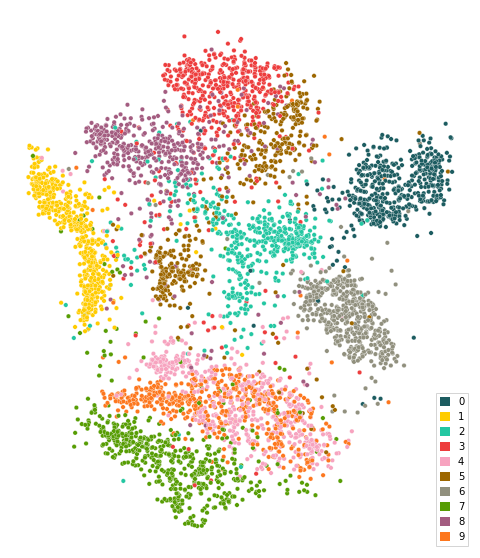

In [11]:
from turtle import bgcolor

paradime.utils.plotting.scatterplot(
    reduced,
    mnist.targets[:num_items],
    s=20,
    bgcolor="white"
)

Because ParaDime models are parametric, you can easily apply the trained model to the whole MNIST dataset, even though our routine only ever saw a small subset of it:

<AxesSubplot:>

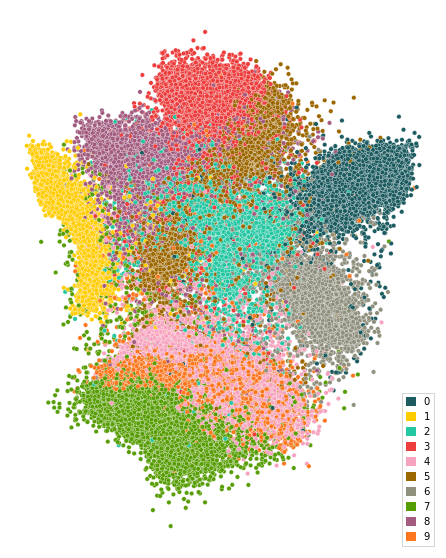

In [12]:
paradime.utils.plotting.scatterplot(
    dr.apply(mnist_data),
    mnist.targets,
    s=20,
    bgcolor="white"
)

If you want to configure our own ParaDime routines, you will need to get an understandin of what was going on behind the scenes. The output log might have given you a first idea about the different parts and steps involved in a routine. All the details are explained in the section about the [Building Blocks of a ParaDime Routine](building_blocks.rst).